In [225]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [226]:
df = pd.read_csv("../CSV/raw/diabetes_data.csv")
df.head(5)

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


### Initial Analysis:
Run some initial analysis on the data and try to determine any correlations in the data between variables as well as understanding the spread of our data (boxplots)

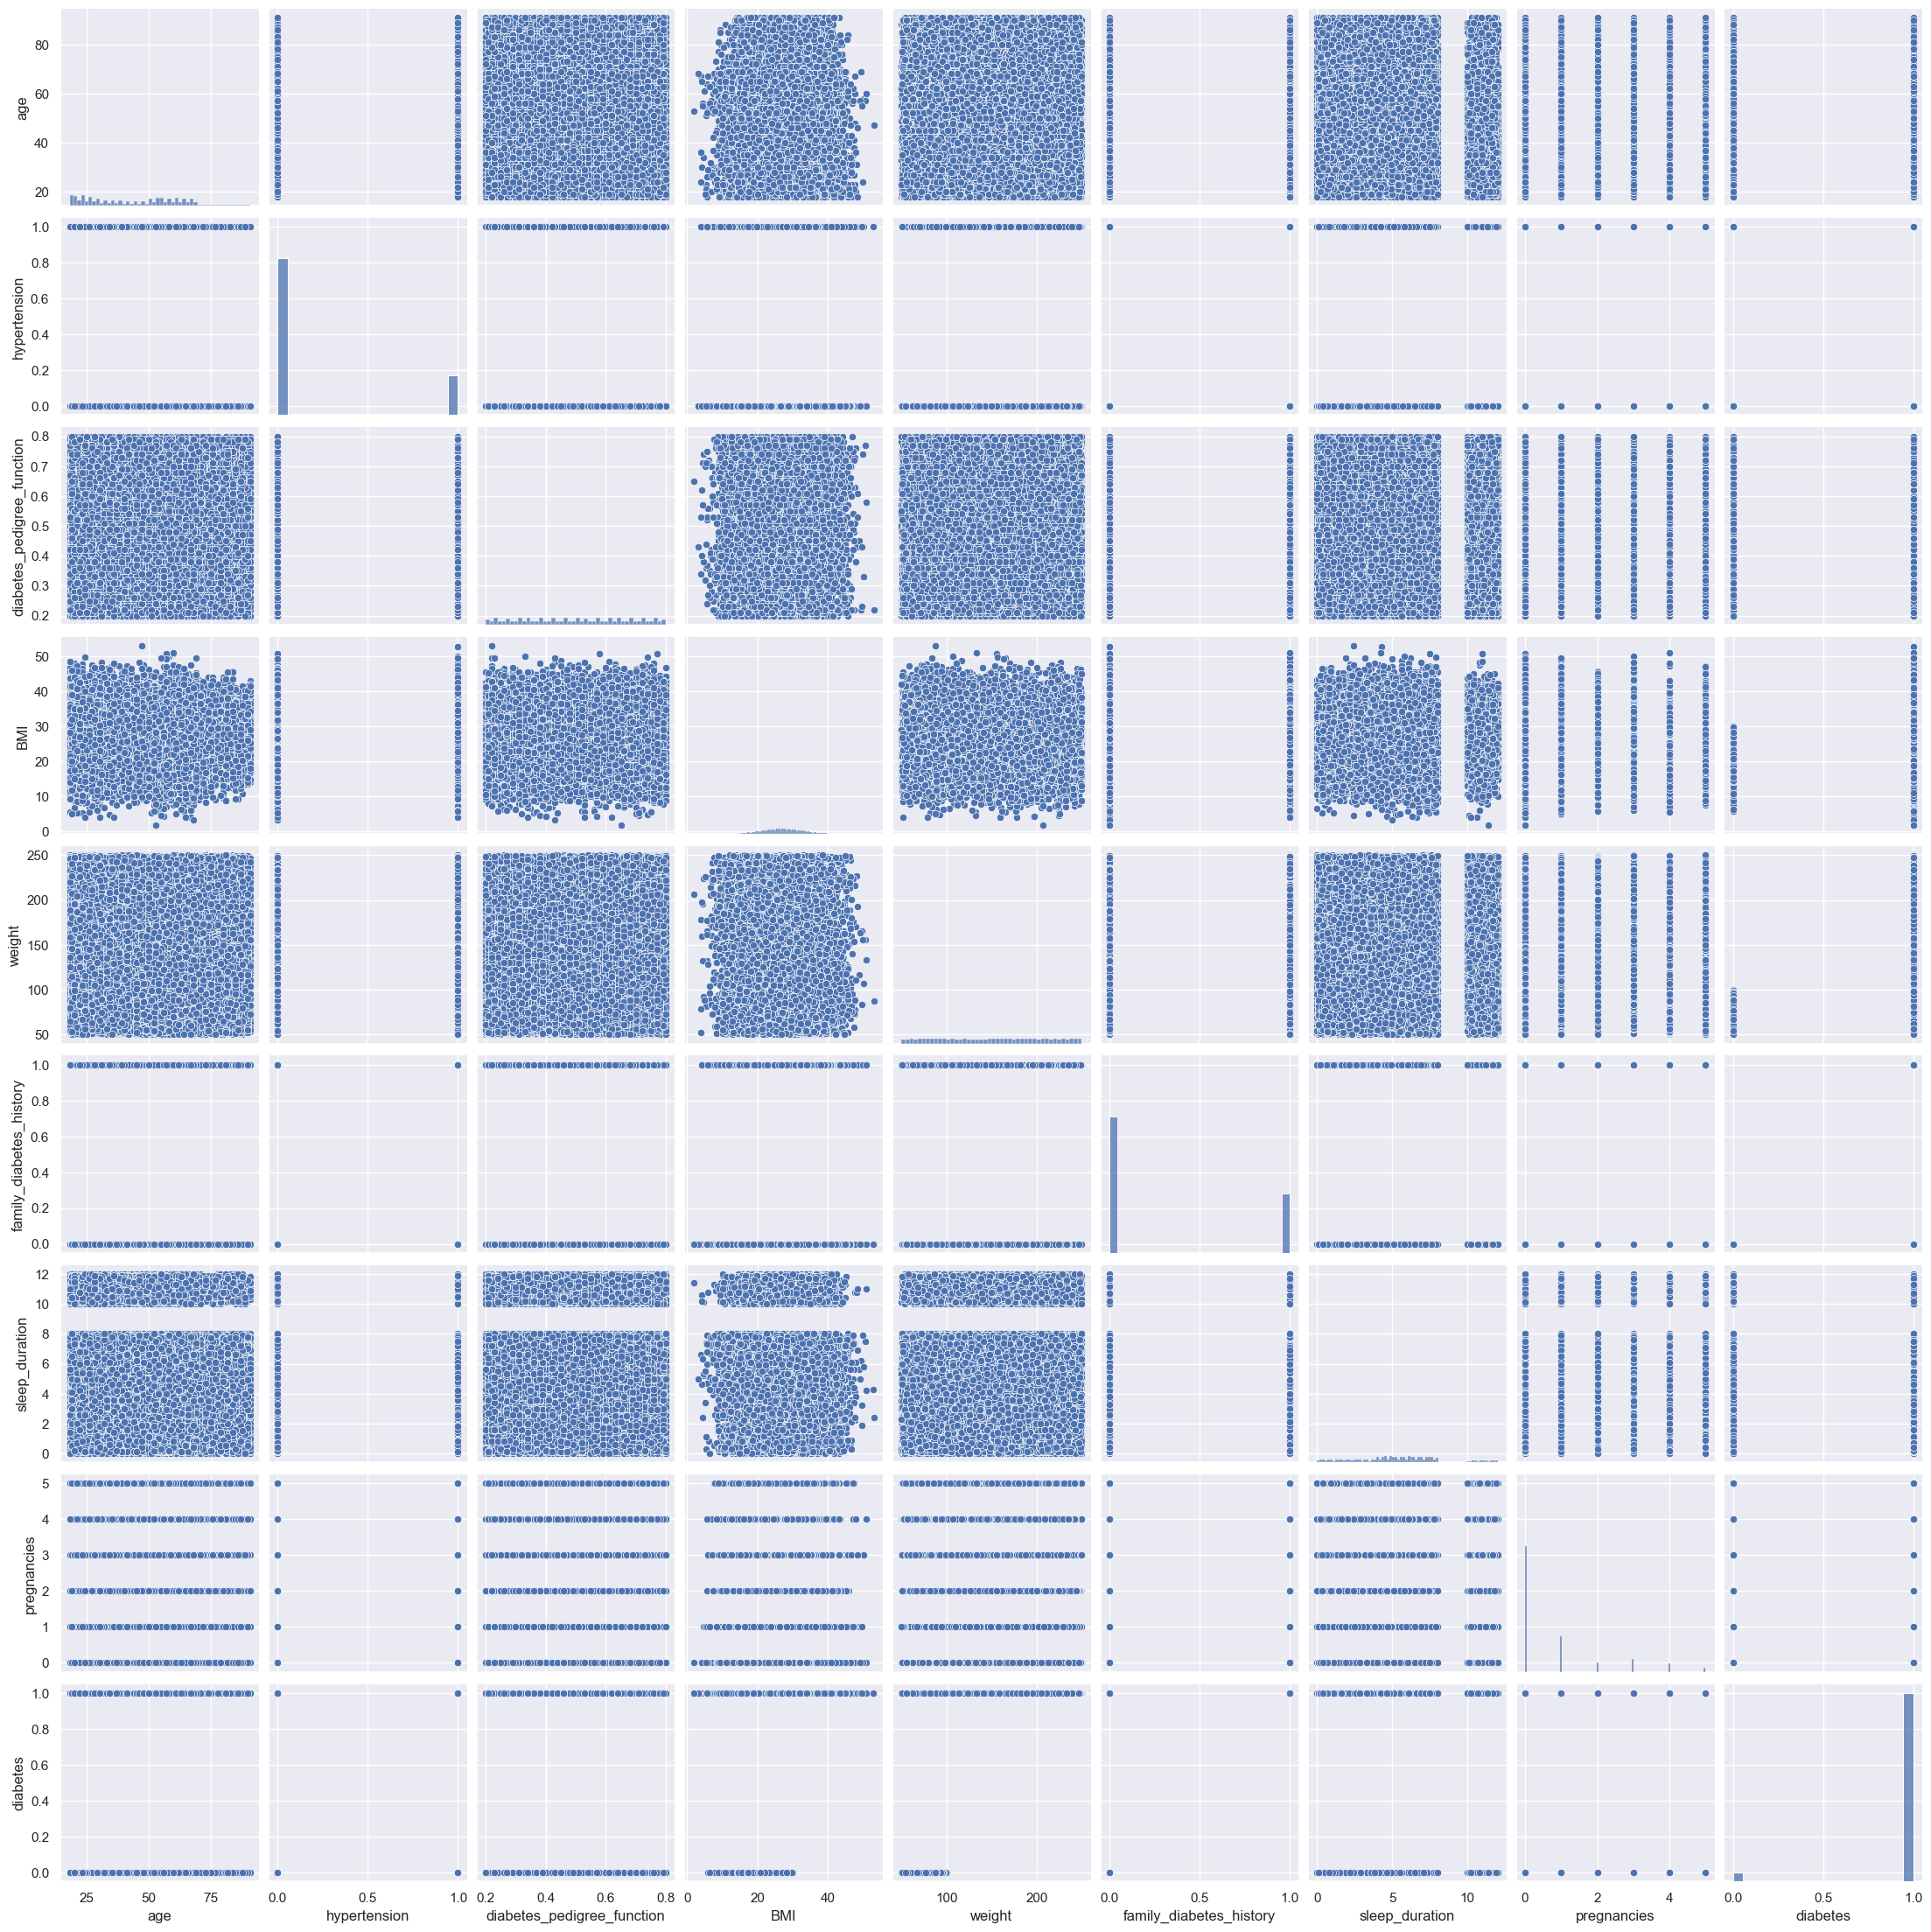

In [227]:
sns.pairplot(df)

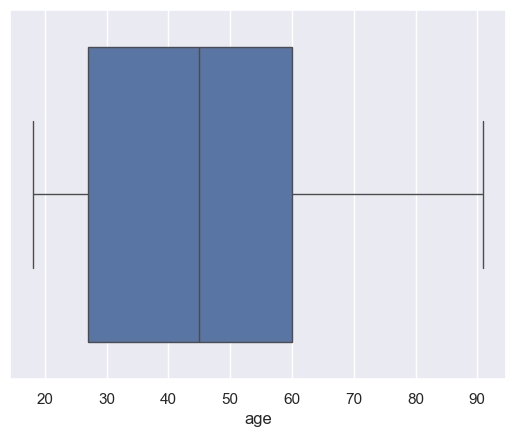

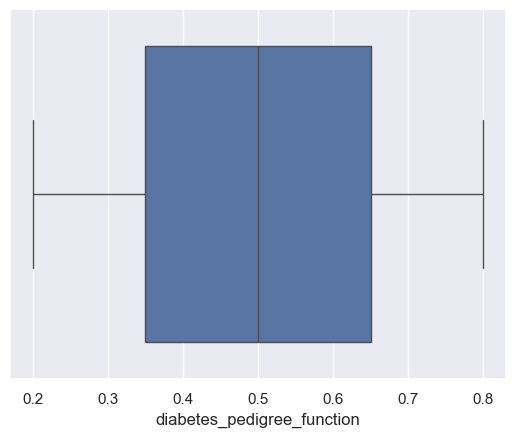

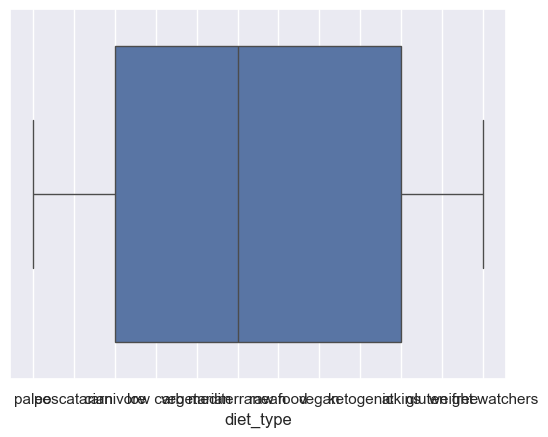

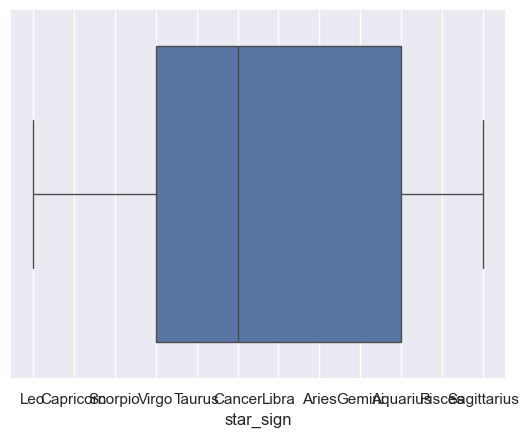

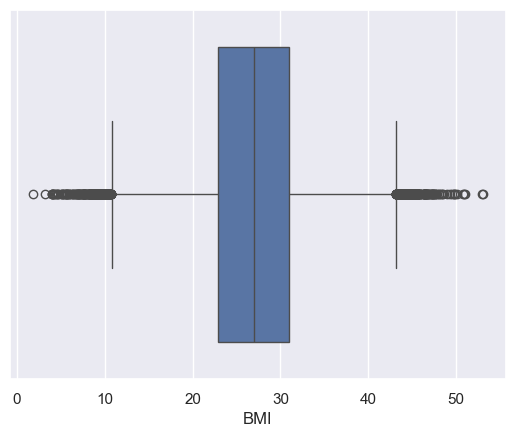

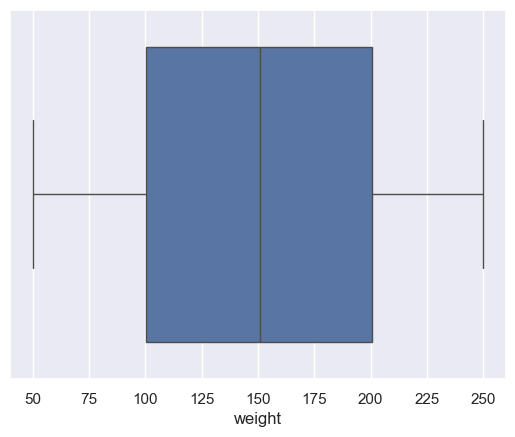

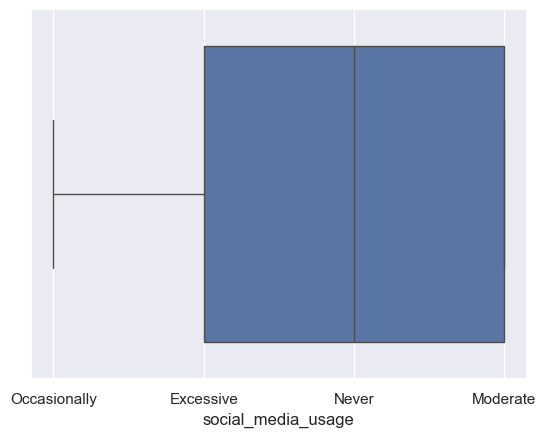

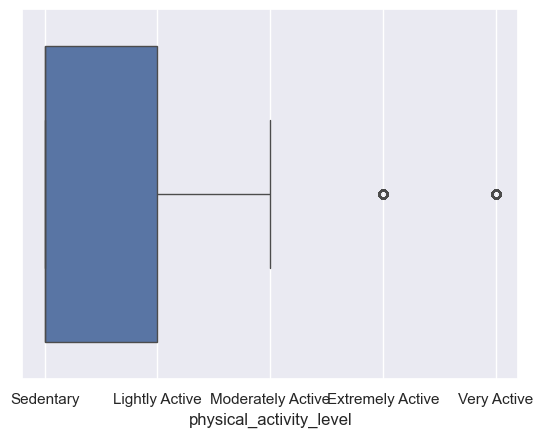

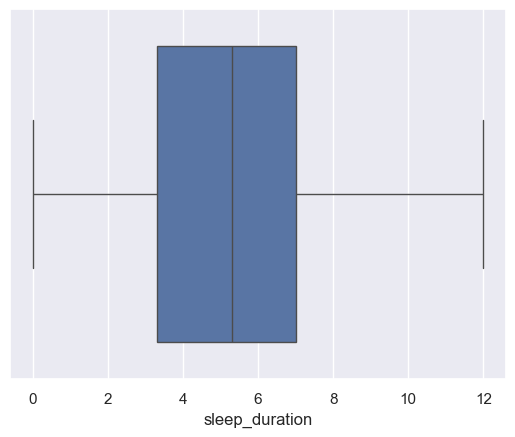

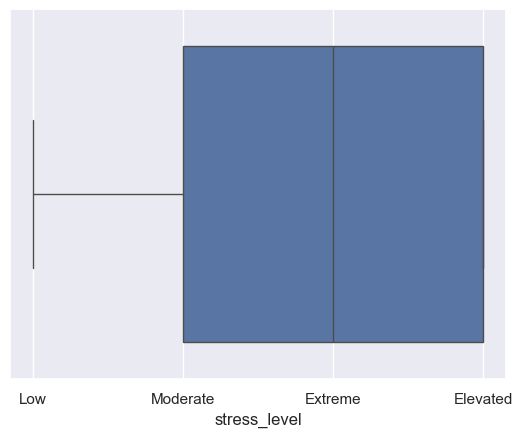

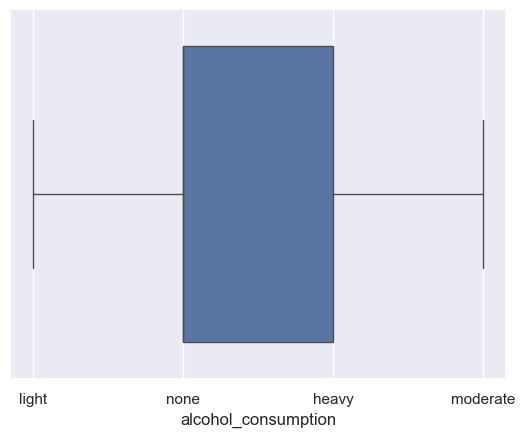

In [228]:
remove_cols = ['gender', 'hypertension', 'diabetes', 'pregnancies', 'family_diabetes_history'] # removing bool columns
plot_df = df.drop(columns=remove_cols)
cols = list(plot_df)

for col in cols:
    plt.figure()
    sns.boxplot(x=plot_df[col])

### Remove Strings:
Since these are strings which are on a scale, we can represent them as integers, for instance they could have been radio buttons in a survey form. This will allow us to populate mean values for the the values which are missing.

In [229]:
#Convert scaled strings/gender to correlating integers (operating under the assumption, this is the scale which was presented to the participants)
df['social_media_usage'] = df['social_media_usage'].replace({'Never':0,'Occasionally':1, 'Moderate':2, 'Excessive':3})
df['physical_activity_level'] = df['physical_activity_level'].replace({'Sedentary':0, 'Lightly Active':1, 'Moderately Active':2, 'Very Active':3, 'Extremely Active':4})
df['stress_level'] = df['stress_level'].replace({'Low':1, 'Moderate':2, 'Elevated':3, 'Extreme':4})
df['alcohol_consumption'] = df['alcohol_consumption'].replace({'none':0,  'light':1,  'moderate':2, 'heavy':3})
df['gender'] = df['gender'].replace({'male':0, 'female':1})
df

C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_29252\411383994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['social_media_usage'] = df['social_media_usage'].replace({'Never':0,'Occasionally':1, 'Moderate':2, 'Excessive':3})
C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_29252\411383994.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['physical_activity_level'] = df['physical_activity_level'].replace({'Sedentary':0, 'Lightly Active':1, 'Moderately Active':2, 'Very Active':3, 'Extremely Active':4})
C:\Users

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,1.0,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,1.0,0.0,1.5,1.0,NaN,1.0,1.0
1,0.0,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,1.0,1.0,5.4,2.0,0.0,0.0,1.0
2,1.0,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,1.0,1.0,7.6,1.0,0.0,1.0,1.0
3,1.0,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,0.0,7.7,1.0,1.0,3.0,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,1.0,0.0,7.8,NaN,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,24.0,NaN,0.29,vegetarian,Libra,18.9,56.0,0.0,0.0,0.0,2.6,3.0,0.0,1.0,1.0
99996,0.0,53.0,1.0,0.64,weight watchers,NaN,28.4,140.8,NaN,3.0,1.0,7.5,2.0,0.0,NaN,1.0
99997,0.0,61.0,0.0,0.34,NaN,Taurus,NaN,NaN,NaN,3.0,1.0,2.8,2.0,0.0,3.0,1.0
99998,0.0,NaN,0.0,0.71,mediterranean,Leo,28.8,123.6,0.0,3.0,0.0,0.4,2.0,0.0,0.0,1.0


In [230]:
df.count()

gender                        79954
age                           80145
hypertension                  80169
diabetes_pedigree_function    80120
diet_type                     79939
star_sign                     79806
BMI                           79934
weight                        80126
family_diabetes_history       79863
social_media_usage            79968
physical_activity_level       80032
sleep_duration                80063
stress_level                  80024
pregnancies                   80033
alcohol_consumption           79896
diabetes                      80242
dtype: int64

### BMI/Weight Oddities:
It was observed that the BMIs and weights of the data were rather out of what would be considered "normal" in real-world data. The lowest being 50kg and highest being 250kg, while the lower band is reasonable, one would assume there would be some data below 50 for smaller people. As for BMIs, the lowest value was 1.8 with a lot of values below 10 with the highest being 53.1 with many values sitting above 40. The average weight value was around 150 and a BMI of around 27, these would be considered very high in a real-world scenario.

In [231]:
df.describe()

,gender,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
count,79954.000000,80145.000000,80169.000000,80120.000000,79934.000000,80126.000000,79863.000000,79968.000000,80032.000000,80063.000000,80024.000000,80033.000000,79896.000000,80242.000000
mean,0.449396,45.107306,0.202248,0.500877,26.978545,150.526618,0.302167,1.498599,0.564312,5.295149,2.501662,0.758212,1.565473,0.954936
std,0.497436,18.550434,0.401678,0.173783,6.005039,57.731539,0.459200,1.117626,0.782400,2.842133,1.117961,1.281326,1.274107,0.207445
min,0.000000,18.000000,0.000000,0.200000,1.800000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,0.000000,0.350000,22.900000,100.300000,0.000000,0.000000,0.000000,3.300000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,0.500000,27.000000,150.900000,0.000000,2.000000,0.000000,5.300000,3.000000,0.000000,1.000000,1.000000
75%,1.000000,60.000000,0.000000,0.650000,31.000000,200.400000,1.000000,2.000000,1.000000,7.000000,4.000000,1.000000,3.000000,1.000000
max,1.000000,91.000000,1.000000,0.800000,53.100000,250.000000,1.000000,3.000000,4.000000,12.000000,4.000000,5.000000,3.000000,1.000000


### Calculating Height:
Due to the large values of weight and BMI, we wanted to understand the heights of the people who are in the dataset. As BMI is a function of weight and height, we can reverse it to calculate heights: the average height of our population is 2.36 meters (around 7ft 9in). Our 75% height is 275cm which is a couple of cms bigger than the world's tallest person (272cm) and our 25% being 192cm which is considered tall.

In [232]:
df['height'] = np.sqrt(df['weight']/df['BMI'])

df.describe()

,gender,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes,height
count,79954.000000,80145.000000,80169.000000,80120.000000,79934.000000,80126.000000,79863.000000,79968.000000,80032.000000,80063.000000,80024.000000,80033.000000,79896.000000,80242.000000,64102.000000
mean,0.449396,45.107306,0.202248,0.500877,26.978545,150.526618,0.302167,1.498599,0.564312,5.295149,2.501662,0.758212,1.565473,0.954936,2.364425
std,0.497436,18.550434,0.401678,0.173783,6.005039,57.731539,0.459200,1.117626,0.782400,2.842133,1.117961,1.281326,1.274107,0.207445,0.573315
min,0.000000,18.000000,0.000000,0.200000,1.800000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.064090
25%,0.000000,27.000000,0.000000,0.350000,22.900000,100.300000,0.000000,0.000000,0.000000,3.300000,2.000000,0.000000,0.000000,1.000000,1.929306
50%,0.000000,45.000000,0.000000,0.500000,27.000000,150.900000,0.000000,2.000000,0.000000,5.300000,3.000000,0.000000,1.000000,1.000000,2.365016
75%,1.000000,60.000000,0.000000,0.650000,31.000000,200.400000,1.000000,2.000000,1.000000,7.000000,4.000000,1.000000,3.000000,1.000000,2.750973
max,1.000000,91.000000,1.000000,0.800000,53.100000,250.000000,1.000000,3.000000,4.000000,12.000000,4.000000,5.000000,3.000000,1.000000,10.721215


### Removing outliers:
While it was previously explored using Z-Scores to determain outliers, it was settled that IQR (Interquartile Range) should be used as it is most common. To improve reusability, the created function takes a DataFrame and a list of columns to remove outliers from. Outliers are considered if they are below our 1st quartile (lowest 25%) or greater than our 3rd quartile (highest 75%). This results in the removal of 822 (when finding the outliers on ['height', 'BMI', 'weight']). Prior to removing outliers, we have removed both the diet_type and star_sign columns as they are categorical data which could not be represented on a scale like the other data.

In [233]:
def iqr_outliers(in_df, cols):
    print("Old Shape: ", in_df.shape)
    drop_set = []
    for col in cols:
        # Calculate the upper and lower limits
        Q1 = in_df[col].quantile(0.25)
        Q3 = in_df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        
        upper_array = np.where(in_df[col] >= upper)[0]
        lower_array = np.where(in_df[col] <= lower)[0]

        drop_set = set().union(drop_set, upper_array, lower_array)
        
    
        # Removing the outliers
    in_df.drop(index=drop_set, inplace=True)
    
    print("New Shape: ", in_df.shape)
    return in_df

In [234]:
remove_cols = ['diet_type','star_sign']
df = df.drop(columns=remove_cols)
df = iqr_outliers(df, ['height', 'BMI', 'weight'])
# df.head(50)

Old Shape:  (100000, 15)
New Shape:  (99178, 15)


In [235]:
df.count()

gender                        79301
age                           79490
hypertension                  79532
diabetes_pedigree_function    79464
BMI                           79112
weight                        79422
family_diabetes_history       79202
social_media_usage            79326
physical_activity_level       79364
sleep_duration                79414
stress_level                  79363
pregnancies                   79372
alcohol_consumption           79207
diabetes                      79572
height                        63398
dtype: int64

### Replacing Null Values:
We wanted to seperate out some columns as we cannot apply averages on them (['gender', 'hypertension', 'family_diabetes_history', 'diabetes', 'pregnancies']). It was also noted that we would have integer columns (the scaled columns previously mentioned as well as age.). 

In order to regain some values which will be potentially lost, we operated under the assumption gender is sex as there is only a male or female recorded and also no records denoted as male had pregnancies recorded against them so we can assume any people who recorded having a pregnancy is a female (allowing us to save over 5815 records which would have been remod )

Firstly, the boolean columns have their null values removed as we cannot populate them with averages.
Secondly, our float columns have their nulls populated by the averages in their columns
Thirdly, we do the averaging on the int columns and then round the values so they can go to the nearest integers

In [236]:

bool_cols = ['gender', 'hypertension', 'family_diabetes_history', 'diabetes', 'pregnancies']
int_cols = ['age', 'social_media_usage','physical_activity_level','stress_level', 'alcohol_consumption']

df.loc[df['pregnancies'] >= 1 , "gender"] = 1 # reclaim some null fields before dropping nulls

df.dropna(subset=bool_cols, inplace=True)

float_df = df.drop(columns=int_cols)
for col in float_df.columns:
    df[col].fillna(df[col].mean(),inplace=True)

for col in int_cols:
    df[col].fillna(round(df[col].mean()),inplace=True)

print(df.isnull().sum())

df.reset_index(drop=True, inplace=True)

gender                        0
age                           0
hypertension                  0
diabetes_pedigree_function    0
BMI                           0
weight                        0
family_diabetes_history       0
social_media_usage            0
physical_activity_level       0
sleep_duration                0
stress_level                  0
pregnancies                   0
alcohol_consumption           0
diabetes                      0
height                        0
dtype: int64


C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_29252\2120357168.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_29252\2120357168.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

### Data subset:
This leaves us with only 35% of our original dataset which is workable due to the assumptions and decisions we have made in the above steps.

In [237]:
df.count()

gender                        35550
age                           35550
hypertension                  35550
diabetes_pedigree_function    35550
BMI                           35550
weight                        35550
family_diabetes_history       35550
social_media_usage            35550
physical_activity_level       35550
sleep_duration                35550
stress_level                  35550
pregnancies                   35550
alcohol_consumption           35550
diabetes                      35550
height                        35550
dtype: int64

### Experimental Random Forest Model
Run a Random Forest Regressor to determine which feature is most important as well as see how accurately we can predict diabetes based on the data we have given to the model.

35550


Text(0.5, 0, 'Feature Importance')

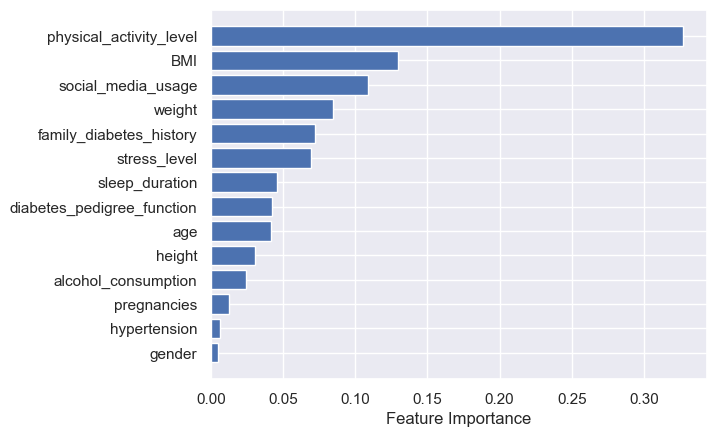

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

data = df
data.dropna(subset=['diabetes'], inplace=True)

X = data.drop('diabetes', axis=1)
print(len(X))
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()

# print(X.columns[sort])
# print(rf.feature_importances_[sort])
plt.barh(X.columns[sort], rf.feature_importances_[sort])

plt.xlabel("Feature Importance")

In [239]:
y_pred = rf.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9818856885688569


### Lastly prettify data/return it to its original format:

In [240]:
df['social_media_usage'] = df['social_media_usage'].replace({0: 'Never', 1: 'Occasionally', 2: 'Moderate', 3: 'Excessive'})
df['physical_activity_level'] = df['physical_activity_level'].replace({0: 'Sedentary', 1: 'Lightly Active', 2: 'Moderately Active', 3: 'Very Active', 4: 'Extremely Active'})
df['stress_level'] = df['stress_level'].replace({1: 'Low', 2: 'Moderate', 3: 'Elevated', 4: 'Extreme'})
df['alcohol_consumption'] = df['alcohol_consumption'].replace({0: 'None', 1: 'Light', 2: 'Moderate', 3: 'Heavy'})
df['gender'] = df['gender'].replace({0: 'Male', 1: 'Female'})
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})
df['family_diabetes_history'] = df['family_diabetes_history'].replace({0: 'No', 1: 'Yes'})
df['diabetes'] = df['diabetes'].replace({0: 'Negative', 1: 'Positive'})
df

,gender,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes,height
0,Male,59.0,No,0.73,17.10000,156.500000,No,Occasionally,Lightly Active,5.400000,Moderate,0.0,None,Positive,3.025235
1,Male,50.0,No,0.43,27.04499,150.172146,No,Excessive,Lightly Active,4.700000,Moderate,0.0,Moderate,Positive,2.351747
2,Male,45.0,No,0.21,24.80000,91.100000,Yes,Never,Sedentary,1.100000,Moderate,0.0,Moderate,Positive,1.916608
3,Female,67.0,No,0.27,21.20000,150.172146,No,Moderate,Moderately Active,6.800000,Moderate,1.0,Moderate,Positive,2.351747
4,Male,50.0,Yes,0.55,25.80000,174.200000,No,Never,Sedentary,5.316513,Extreme,0.0,Moderate,Positive,2.598449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35545,Female,23.0,No,0.23,20.80000,66.900000,No,Never,Extremely Active,3.800000,Low,1.0,Moderate,Negative,1.793417
35546,Male,45.0,Yes,0.46,27.04499,115.200000,Yes,Moderate,Lightly Active,5.316513,Moderate,0.0,Moderate,Positive,2.351747
35547,Male,37.0,No,0.49,27.04499,113.700000,No,Occasionally,Lightly Active,5.316513,Moderate,0.0,Moderate,Positive,2.351747
35548,Female,52.0,No,0.72,17.40000,54.500000,No,Moderate,Lightly Active,5.316513,Elevated,5.0,None,Negative,1.769798


### Produce a CSV which can be consumed by PowerBI

In [241]:
df.to_csv("../CSV/Cleaned_Data/clean_diabetes_data.csv")